## Members of the team

- Francisco Jesús Díaz Pellejero
- Javier Villar Asensio
- Tamara Redondo Soto

Github repository: https://github.com/JavierVillarAsensio/Machine-Learning-Techniques_DiazRedondoVillar

## 0. Data Loading

There are several alternatives to load the data in Google Colab

1. Code for "Choose Files ..."
2. Upload to Colab FileSystem

(the following ones are not available for this activity)

3. Download from github with `wget`
4. Read directly using pandas (url from github) 

Choose one of them (1 or 2)...

In [27]:
import pandas as pd

df = pd.read_csv("/content/worldcup_2018_final_data.csv", index_col = [0])
df

,team_name,team_round,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,...,fouls_recieved_average,yellow_cards_average,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average
1,Argentina,Round of 16,1.50,0.00,1.50,0.00,0.00,0.00,0.00,1.25,...,19.00,2.75,0.00,18.5,15.0,1.50,3.75,1.24,1.04,0.09
2,Australia,Group stage,0.00,0.67,0.67,0.00,0.00,0.67,0.00,0.67,...,10.00,2.33,0.00,17.0,12.0,3.00,4.67,1.17,-1.50,0.10
3,Belgium,Third,2.14,0.14,2.29,0.00,0.00,0.14,0.00,1.72,...,10.57,1.57,0.00,14.0,11.0,3.57,4.57,1.70,4.13,0.11
4,Brazil,Quarter-finals,1.40,0.20,1.60,0.20,0.00,0.00,0.00,1.20,...,14.40,1.40,0.00,16.0,13.0,1.00,1.40,2.47,-4.35,0.12
5,Colombia,Round of 16,0.50,1.00,1.50,0.75,0.25,0.00,0.00,0.75,...,13.00,2.25,0.25,14.0,8.0,2.50,3.25,0.68,3.28,0.07
6,Costa Rica,Group stage,0.33,0.33,0.67,0.33,0.00,0.00,0.00,0.00,...,11.67,2.00,0.00,13.0,11.0,3.33,5.00,0.70,-0.09,0.08
7,Croatia,Runner-up,1.71,0.29,2.00,0.00,0.14,0.14,0.00,1.57,...,15.29,2.14,0.00,11.5,8.5,2.86,4.14,1.49,3.57,0.09
8,Denmark,Round of 16,0.50,0.25,0.75,0.00,0.00,0.00,0.25,0.75,...,7.00,1.50,0.00,14.0,10.0,4.75,5.00,0.70,0.20,0.07
9,Egypt,Group stage,0.33,0.33,0.67,0.00,0.00,0.33,0.00,0.67,...,7.33,1.67,0.00,9.5,9.0,3.00,5.00,0.88,-0.63,0.09
10,England,Fourth,0.43,1.29,1.71,0.57,0.43,0.57,0.00,1.00,...,14.43,1.14,0.00,18.0,14.0,2.43,3.57,1.48,1.61,0.11


In [28]:
df.dtypes

team_name                            object
team_round                           object
goals_scored_open_play_average      float64
goals_scored_set_play_average       float64
goals_scored_average                float64
                                     ...   
goalkeeper_saves_average            float64
shots_on_target_conceded_average    float64
xg_total_average                    float64
goals-xG_total                      float64
xg_per_shot_average                 float64
Length: 69, dtype: object

### Feature Selection

First of all, we can delete non-numerical variables and then select a subset of variables related to offense in football matches such as goals, xg-goals (Expected goals), dribbles, crosses, etc. 

We can also discard redundant variables. For example: dribbles_completed_average and dribbles_completed_percentage are showing the same information but with different representation. Almost all the percentages can be cut out with a few exceptions (shot_precision, which can only be measured by a percentage value).

This variables will be read from a txt file.

In [29]:
with open("selected_variables.txt") as file:
    included = [line.rstrip() for line in file]
included

['goals_scored_open_play_average',
 'goals_scored_set_play_average',
 'goals_scored_average',
 'goals_scored_corner_average',
 'goals_scored_free_kick_average',
 'goals_scored_penalty_average',
 'goals_scored_.throw_in_average',
 'goal_scored_foot_average',
 'goals_scored_header_average',
 'goals_scored_own_goal_average',
 'final_third_entries_average',
 'penalty_area_entries_average',
 'shot_precision_percentage',
 'shots_per_goal_average',
 'shots_on_target_per_goal_average',
 'shots_inside_penalty_area_per_goal_average',
 'shots_outside_penalty_area_per_goal_average',
 'shots_on_target_average',
 'shots_average',
 'possession_average',
 'passes_average',
 'passes_completed_per_match_average',
 'bypassed_opponents_average',
 'bypassed_defenders_average',
 'dribbles_average',
 'dribbles_completed_average',
 'corners_average',
 'crosses_average',
 'crosses_completed_average',
 'xg_total_average',
 'goals-xG_total',
 'xg_per_shot_average']

In [30]:
df_1 = df[included]
df_1.dropna()
df_1.head()

,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,goals_scored_own_goal_average,...,bypassed_opponents_average,bypassed_defenders_average,dribbles_average,dribbles_completed_average,corners_average,crosses_average,crosses_completed_average,xg_total_average,goals-xG_total,xg_per_shot_average
1,1.50,0.00,1.50,0.00,0.00,0.00,0.0,1.25,0.25,0.00,...,273,29,20.25,13.25,6.00,12.50,1.75,1.24,1.04,0.09
2,0.00,0.67,0.67,0.00,0.00,0.67,0.0,0.67,0.00,0.00,...,291,26,18.00,11.00,4.67,12.33,2.00,1.17,-1.50,0.10
3,2.14,0.14,2.29,0.00,0.00,0.14,0.0,1.72,0.43,0.14,...,310,49,17.29,13.14,5.71,10.43,2.86,1.70,4.13,0.11
4,1.40,0.20,1.60,0.20,0.00,0.00,0.0,1.20,0.40,0.00,...,332,45,22.60,14.80,8.20,12.80,2.60,2.47,-4.35,0.12
5,0.50,1.00,1.50,0.75,0.25,0.00,0.0,0.75,0.75,0.00,...,270,33,16.00,7.75,3.25,12.75,2.00,0.68,3.28,0.07


## 1. Dimensionality Reduction

### 1.1 Variable correlation

After excluding useless features, we will study the Pearon correlation between variables using the corr.(method = 'pearson') method

In [31]:
pearsoncorr = df_1.corr(method='pearson')
pearsoncorr

,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,goals_scored_own_goal_average,...,bypassed_opponents_average,bypassed_defenders_average,dribbles_average,dribbles_completed_average,corners_average,crosses_average,crosses_completed_average,xg_total_average,goals-xG_total,xg_per_shot_average
goals_scored_open_play_average,1.000000,-0.236949,0.816824,-0.093560,-0.129151,-0.154344,-0.082758,0.845040,0.227120,0.221666,...,0.170930,0.451630,0.256893,0.393079,0.233898,0.042865,0.111377,0.437863,0.501731,0.317131
goals_scored_set_play_average,-0.236949,1.000000,0.366857,0.608850,0.663954,0.380388,-0.116422,0.127801,0.622739,-0.014882,...,0.067395,-0.029013,-0.162932,-0.161272,0.027868,-0.001747,-0.095229,0.056788,0.338956,0.190661
goals_scored_average,0.816824,0.366857,1.000000,0.271326,0.271393,0.077618,-0.150225,0.883865,0.588062,0.205822,...,0.203541,0.415217,0.148264,0.279695,0.239488,0.041608,0.052275,0.452658,0.682822,0.416812
goals_scored_corner_average,-0.093560,0.608850,0.271326,1.000000,0.141962,-0.138759,-0.121584,0.041323,0.575368,-0.041490,...,0.126519,-0.070394,0.166453,0.084552,0.117299,0.107543,0.104032,0.019811,0.181732,-0.080279
goals_scored_free_kick_average,-0.129151,0.663954,0.271393,0.141962,1.000000,-0.086154,-0.123877,0.028762,0.518828,0.086564,...,0.120949,0.190496,-0.374279,-0.308569,0.102305,0.053733,0.001359,0.075107,0.259785,0.151132
goals_scored_penalty_average,-0.154344,0.380388,0.077618,-0.138759,-0.086154,1.000000,-0.155143,0.153212,-0.050765,-0.077089,...,-0.123753,-0.193521,-0.023235,0.009353,-0.165742,-0.175945,-0.299820,0.063221,0.092896,0.320117
goals_scored_.throw_in_average,-0.082758,-0.116422,-0.150225,-0.121584,-0.123877,-0.155143,1.000000,-0.059085,-0.167366,-0.122203,...,-0.086680,0.089495,-0.095132,-0.099059,-0.011636,-0.120639,-0.096895,-0.210205,-0.004927,-0.238813
goal_scored_foot_average,0.845040,0.127801,0.883865,0.041323,0.028762,0.153212,-0.059085,1.000000,0.222696,0.006919,...,0.284533,0.383161,0.260131,0.400472,0.339682,0.084516,0.021342,0.547174,0.490980,0.404717
goals_scored_header_average,0.227120,0.622739,0.588062,0.575368,0.518828,-0.050765,-0.167366,0.222696,1.000000,-0.093933,...,0.156472,0.311972,-0.039775,-0.027702,0.190952,0.095899,0.202069,0.112005,0.504176,0.110874
goals_scored_own_goal_average,0.221666,-0.014882,0.205822,-0.041490,0.086564,-0.077089,-0.122203,0.006919,-0.093933,1.000000,...,-0.372490,-0.090988,-0.155321,-0.093693,-0.459295,-0.279708,-0.225604,-0.110366,0.324474,0.209277


As we can see, having a large number of variables can make this correlation table more time consuming to interpret. That's why wee need to visualize the table using the seaborn package in pandas

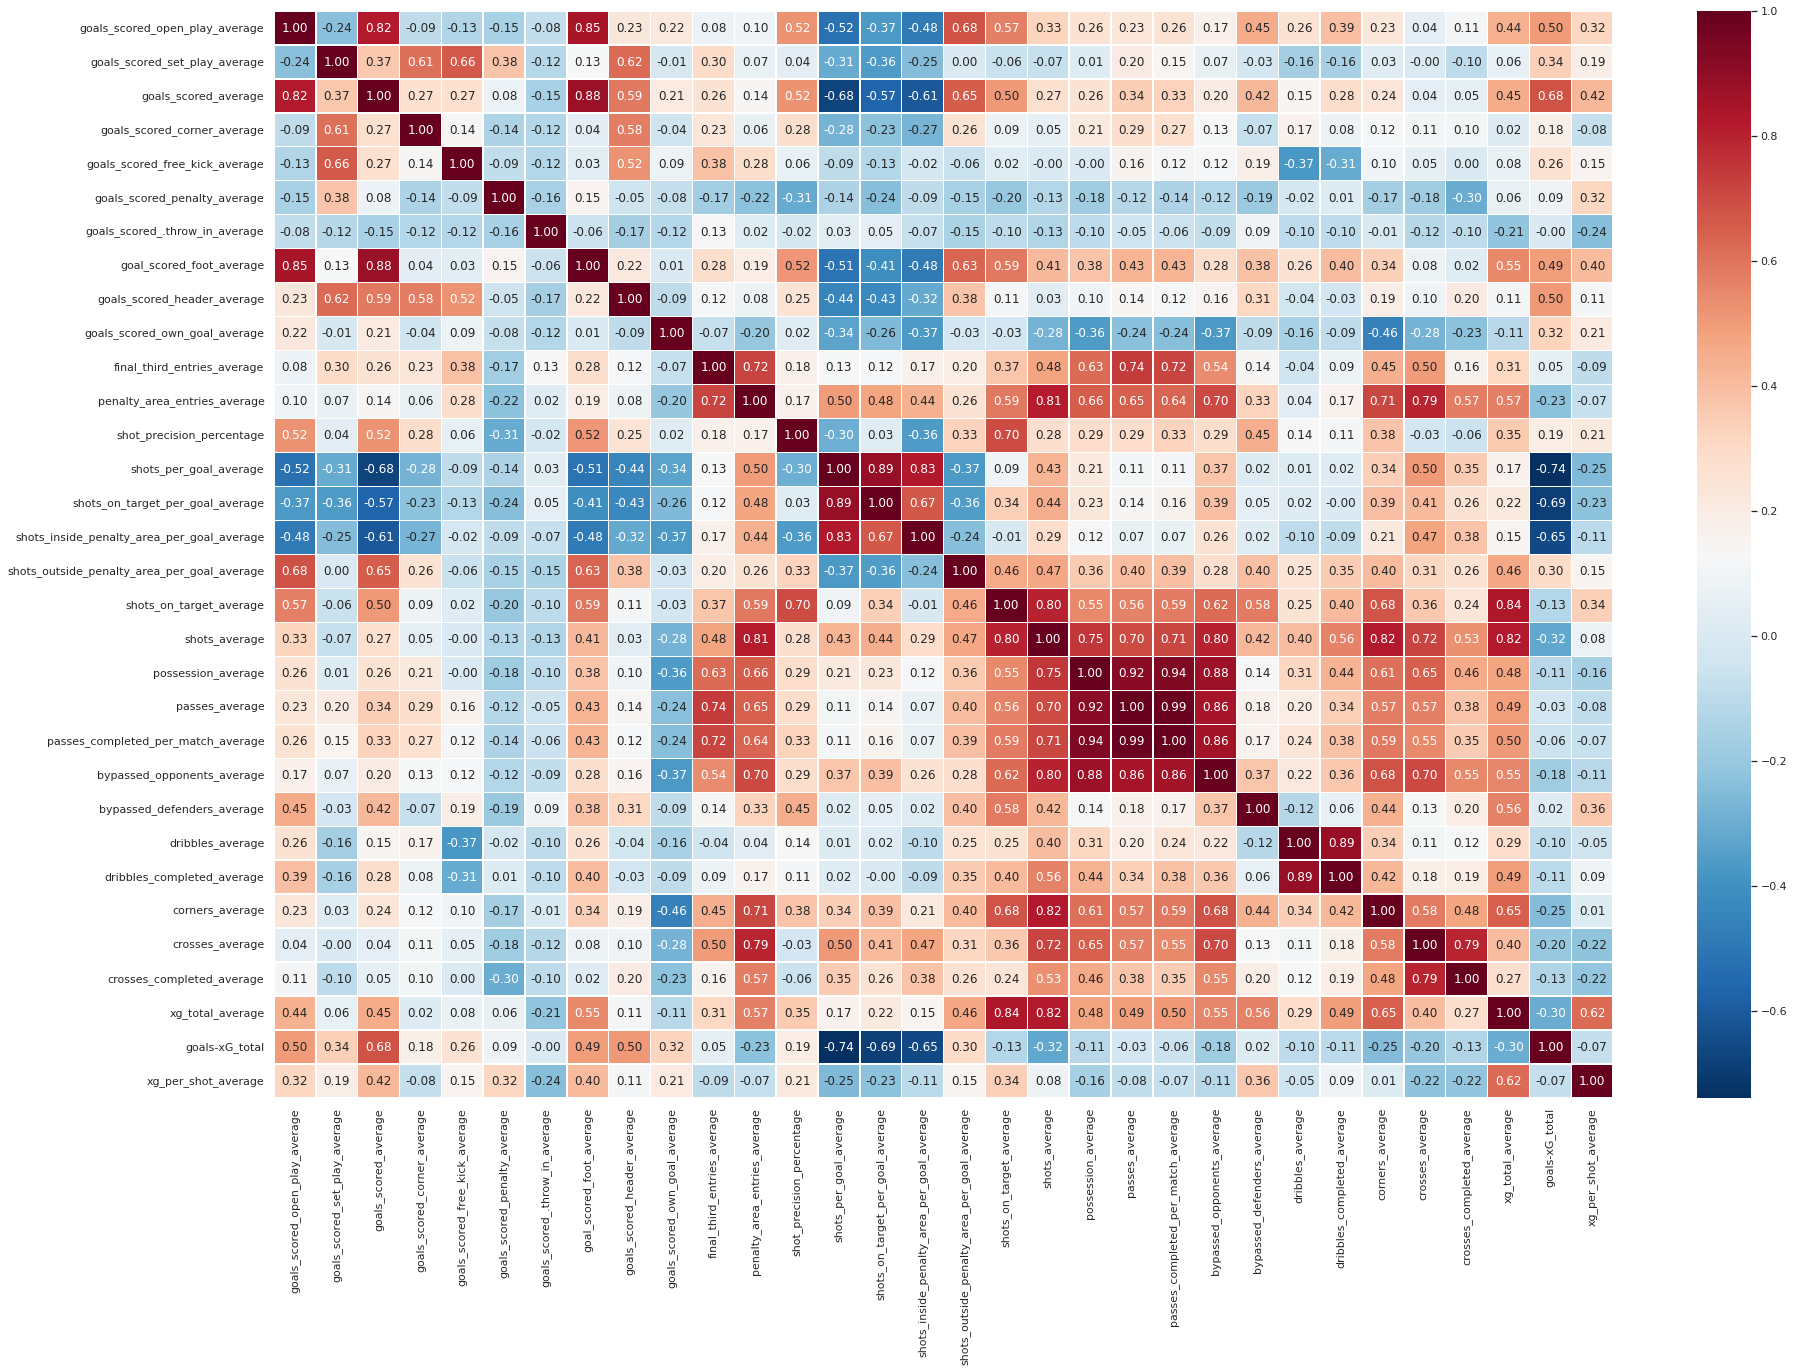

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 20))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
            fmt='.2f')

### 1.2 Principal Component Analysis

#### 1.2.1 Standarization/Normalization

The data has to be [standarized](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) or [normalized](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) 

We have 3 alternatives
1. StandardScaler
2. MinMaxScaler
3. MaxAbsScaler

In this case we will use StandardScaler




In [33]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
teams = scaler.fit_transform(df_1)
teams

array([[ 1.5371764 , -1.4497055 ,  0.6036128 , ...,  0.09205186,
         0.33940519, -0.27906376],
       [-1.45975566,  0.6983032 , -0.99002099, ..., -0.07159589,
        -0.76983702,  0.24623273],
       [ 2.81586741, -1.00086786,  2.12044495, ...,  1.16745137,
         1.68883763,  0.77152922],
       ...,
       [ 0.53819905, -0.64820972,  0.12360262, ..., -0.6794304 ,
         0.47915224, -1.85495324],
       [ 0.53819905,  0.6983032 ,  0.93001972, ...,  0.95704712,
        -0.03616501,  1.82212221],
       [-0.26098283,  1.11508101,  0.41160873, ..., -0.07159589,
         0.38744323, -0.27906376]])

1. Execute the PCA. After applying a linear transormation with the covariance matrix to the data, we will have 32 principal components (eigenvectors) with their corresponding eigenvalues. All of these steps can be performed with the sklearn library

In [34]:
from sklearn.decomposition import PCA
pca = PCA ()
X_pca = pca.fit_transform(teams)
X_pca.shape

(32, 32)

2. Decide the number of components for visualization and also for using it for clustering

In [35]:
import plotly.express as px
import numpy as np

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.line(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)
 

As we can see, with 10 components or eigenvectors we would have an explained variance of roughly 0.91 that can can account for all the dispersion of the data. This value is close to 1 so it is optimal. We could choose more components but the value increase of variance is minimal and we would be having too many elements to compute

In [36]:
X_pca = PCA (n_components = 10 ).fit_transform(teams)

3. Visualization of the Data

Using a 2D chart to visualize the data. The color of the points must be related to the final phase achieved by the teams.


In [37]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].team_name)
fig.show()

PCA components

**Extended Work** Use another decomposition technique, for example, [Kernel PCA](https://scikit-learn.org/stable/modules/decomposition.html#kernel-principal-component-analysis-kpca)

## 2. K-means

We use the data we have previously parametrized with the PCA method

In [38]:
init = 'random' 
iterations = 25
max_iter = 300 
tol = 1e-04 
seed = 0

This is the configuration we have chosen for the execution of the algorithm:
 - **init** = The method with which we are spawning the centroids
 - **iterations** = The number of tries we are giving to find a good beginning, we want few iterations so we wish to have the best beginning
 - **max_iter** = The maximun number of iterations we let the algorithm find the optimun centroids so it does not stucks in a loop nor last too much
 - **tol** = The minimun quantity of change in the error until convergence

### 2.1 Obtain the parameter **k**

We are calculationg the silhouettes and the distortion so depending on the results we get we can choose the best `k`. Our minimun number of clusters is 2 and we dont want more than 10

In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 10):
    km = KMeans(n_clusters = i, init = init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = seed)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

So now we can plot the values of silhouette and distortion in order to see which is the best value for `k`

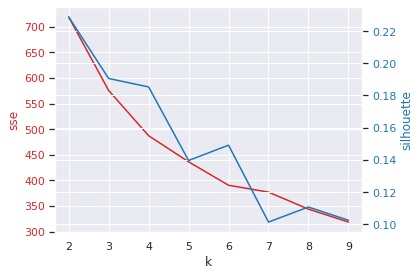

In [40]:
import matplotlib.pyplot as plt

x = [i for i in range(2,10)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Seeing the chart we can ponder over the best value and there are two possible, **4** and **6**. We are using `k = 4` because despite the fact that its sse is higher its silhouette value also is

### 2.3 Execute k-means

Now we can execute the algorithm with our `k` value and the configuration we decided earlier

In [41]:
k = 4
km = KMeans(n_clusters = k, init = init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = seed)
labels = km.fit(X_pca)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, labels.labels_))
      
print('Distortion: %.2f' % km.inertia_)
print('centers')
labels.cluster_centers_[1]

Silhouette Coefficient: 0.185
Distortion: 487.22
centers


array([-2.04054094,  1.2400977 , -0.43832457,  0.07841597, -0.0317204 ,
        0.09374377, -0.06220553,  0.00950225, -0.07642761, -0.00284759])

### 2.4 Visualization

Visualization of the clustering results (color = label) using the PCA with two components data. 

**Extended work**: Plot also the centroids

In [42]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)

for c in range(0, k):
     fig.add_annotation(x = labels.cluster_centers_[c,0], y = labels.cluster_centers_[c,1], text = 'CENTROID')
for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].team_name)
fig.show()

### 2.5 Interpretation of the results

The most important part in clustering is the interpretation of the results. Then, It is necessary to describe what is the meaning of each group. for this purpose, use descriptive statistics, charts, and include the "no clustering" variables like *team* and *final round*

In [43]:
df['kmeans_group'] = km.labels_

Now with a simple query we can obtain information about the groups to see their common behaviour. In this example we can see the `average shots on target` made by each group with some useful statistical information

In [44]:
df[['shots_on_target_average','kmeans_group']].groupby('kmeans_group').describe()

shots_on_target_average                                        \
                               count      mean       std  min    25%   50%   
kmeans_group                                                                 
0                                6.0  5.183333  1.495883  3.5  4.125  5.10   
1                               17.0  2.994118  0.830264  1.3  2.700  3.00   
2                                8.0  3.850000  0.456696  3.0  3.575  3.95   
3                                1.0  6.700000       NaN  6.7  6.700  6.70   

                          
                75%  max  
kmeans_group              
0             5.775  7.6  
1             3.700  4.3  
2             4.225  4.3  
3             6.700  6.7

### Open Questions

**Extended Work**

Would you change the process in some points?

Do you think we need more data to obtain conclusions?

## 3. Hierarchical Clustering

### 3.1 Similarity Matrix

Once the data has been normalized using 'StandardScaler' in section 1.2.1, we will calculate the similarity matrix between the different elements using the Euclidean distance.

In [45]:
import sklearn.neighbors
import numpy as np

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(teams)

avSim = np.average(matsim)
print ('Average Distance', avSim)

Average Distance 7.567760949140045


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



And we visualize it using the 'seaborn' library and the heatmap 'heatmap'.

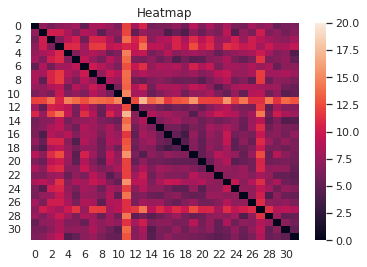

In [82]:
import seaborn as sns; sns.set()
plt.title("Heatmap") 
ax = sns.heatmap(matsim,vmin=0, vmax=20.0)

### 3.2 Dendrogram

Once the similarity matrix has been calculated, we will perform the dendrogram. The standard algorithm chosen for the agglomerative hierarchical clustering has been the complete linkage, offering more balanced groups than the single linkage.

In [47]:
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method ='complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



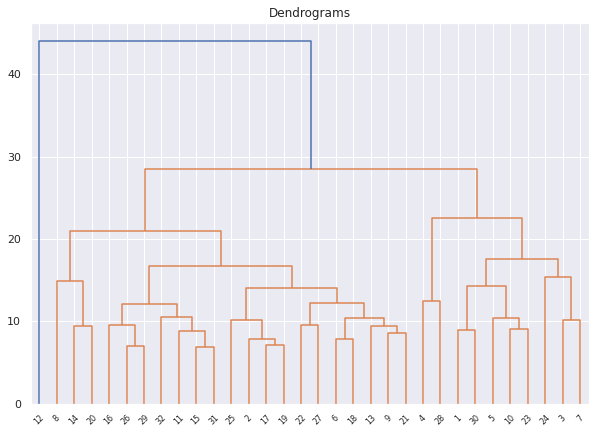

In [73]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms") 
dend = cluster.hierarchy.dendrogram(clusters, labels = df_1.index)

We cut by creating 3 clusters. The first cluster, the one that covers more numbers Average(8, 14, 20, 16, 26, 29, 32, 11, 15, 31, 25, 2, 17, 19, 22, 27, 6, 18, 13, 9, 21), followed by the second cluster is formed by Least Offensive(4, 28, 1, 30, 5, 10, 23, 24, 3, 7) and the third Most Offensive(12). The final division chosen covers the maximum of numbers represented in the graph.

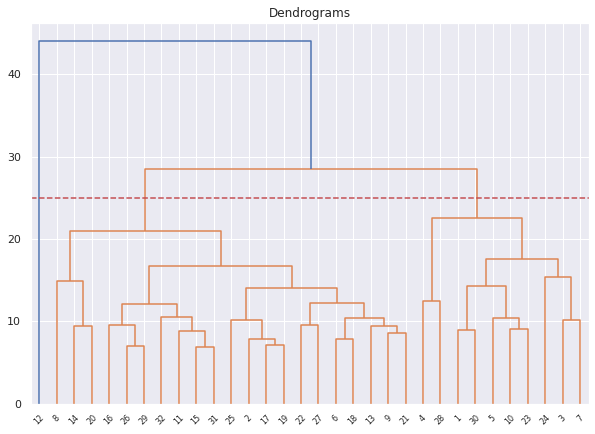

In [74]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = cluster.hierarchy.dendrogram(clusters, labels = df_1.index)
plt.axhline(y=25, color='r', linestyle='--')

Finally, we will cut the dendrogram using the 'distance' criterion. It depends mainly on a distance threshold 't', the maximum distance between clusters allowed. If we assign the value t=25, equal to the threshold represented in the dendrogram, we obtain the 3 clusters mentioned above (1,2,3).

In [68]:
labels = cluster.hierarchy.fcluster(clusters, t=25 , criterion = 'distance')

labels

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1], dtype=int32)

We can apply the Silohuette coefficient, a metric to evaluate the quality of the clustering obtained, indicating the optimal number of clusters, which coincides.

In [75]:
from sklearn import metrics
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(teams, labels))

Estimated number of clusters: 3
Silhouette Coefficient: 0.177
